# Fuzzy C Means
    Clustering algorithm testing

In [1]:
import os
import math

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from PIL import Image
from FuzzyCMeans import FuzzyCMeans

### 04 groups example
    Run clustering example against a test dataset of points visually distributed among 04 groups

### Utils

In [70]:
def plotCentroids(
    k: int, title: str, centroids: np.array,
    xRange: tuple, yRange: tuple,
    radius = .5, scale = 5, colors = ['r', 'y', 'm', 'g'],
) -> None:

    # Plotting parameters
    sizeR = math.ceil(scale * (yRange[1] - yRange[0]))
    sizeC = math.ceil(scale * (xRange[1] - xRange[0]))

    # Plot centroids
    plt.figure(figsize=(sizeC, sizeR))
    ax = plt.gca()

    ax.cla() # Clear (what?) things
    ax.set_xlim(xRange)
    ax.set_ylim(yRange)
    ax.set_title(title)

    for j in range(k):
        x, y = centroids[j, :]
        circle = plt.Circle((x, y), radius, color=colors[j], fill=False)
        ax.add_patch(circle)


def setAndPlotCentroids(
    k: int, m: float, X: np.array,
    xRange: tuple, yRange: tuple,
    scale=5, maxDelta=.001, maxEpochs=1000,
) -> None:
    
    # Determine centroids
    cMeans = FuzzyCMeans(X=X, k=k, m=m, maxDelta=maxDelta, maxEpochs=maxEpochs)
    centroids = cMeans.fit().getCentroids()

    # Plot
    title = 'Grouping: k = ' + str(k) + ' | m = ' + str(m)

    plotCentroids(
        k=k, title=title, centroids=centroids,
        xRange=xRange, yRange=yRange,
        radius=.5, padding=.2, scale=scale,
        colors = ['r', 'y', 'm', 'g', 'c', 'b'],
    )

### Test

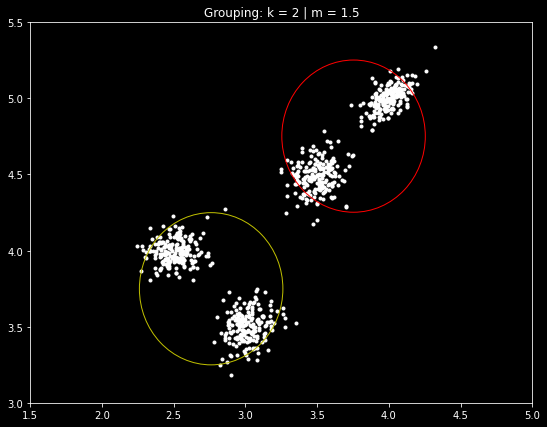

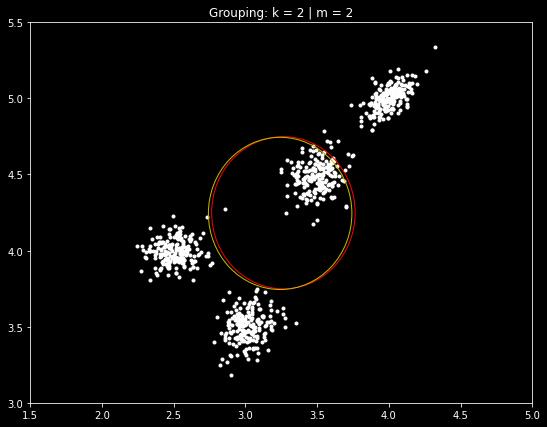

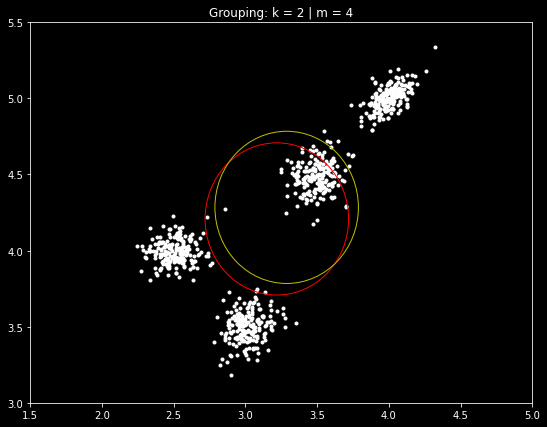

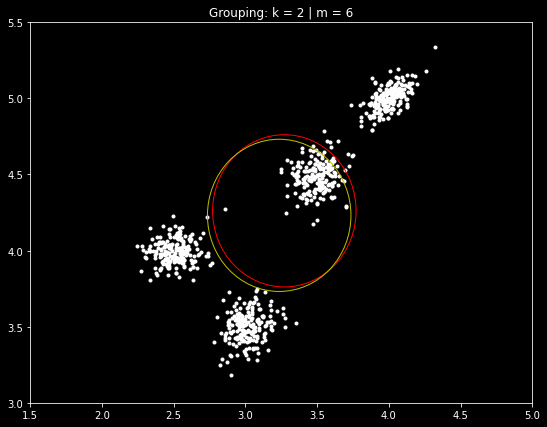

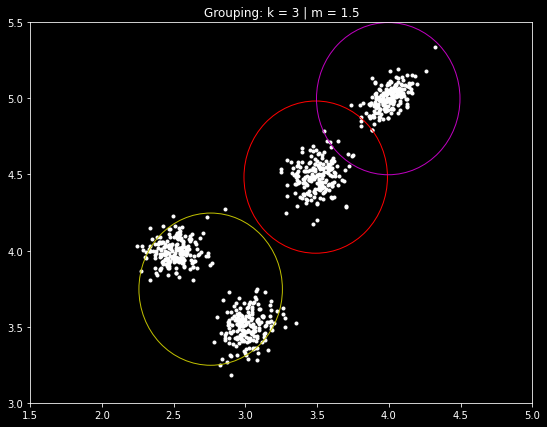

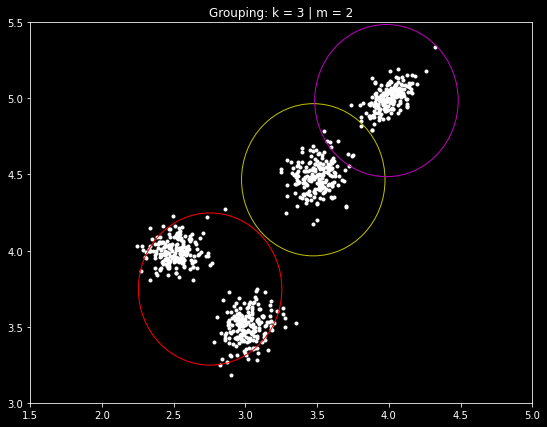

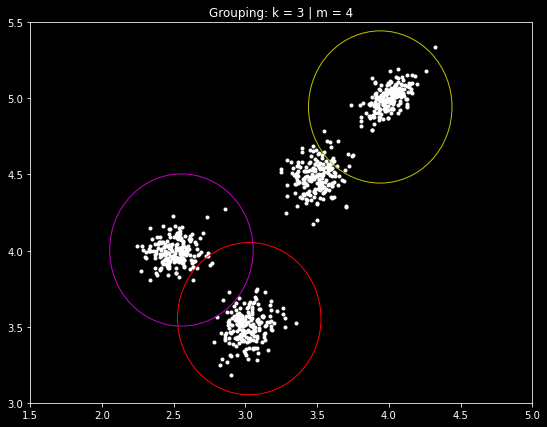

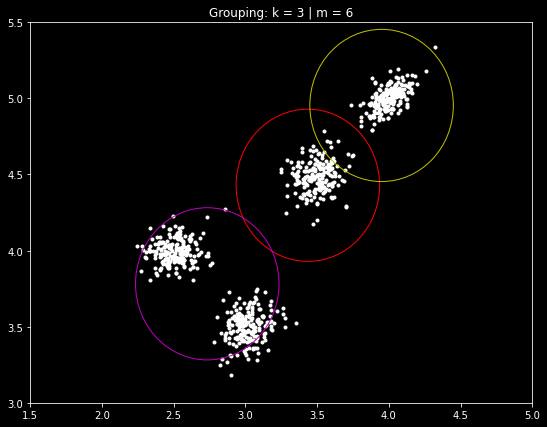

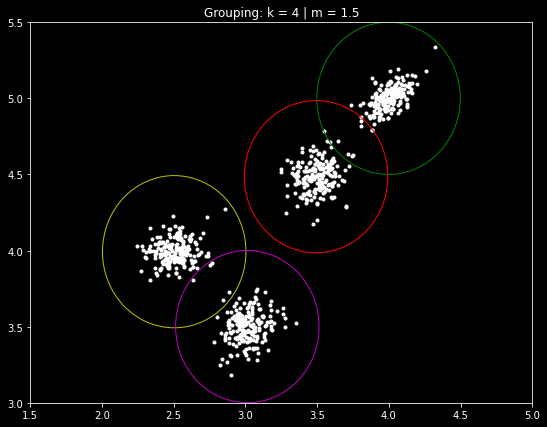

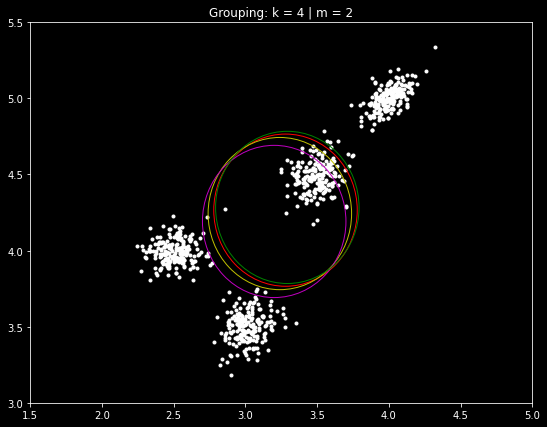

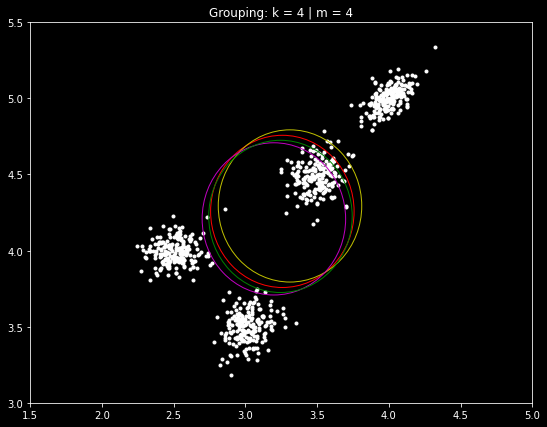

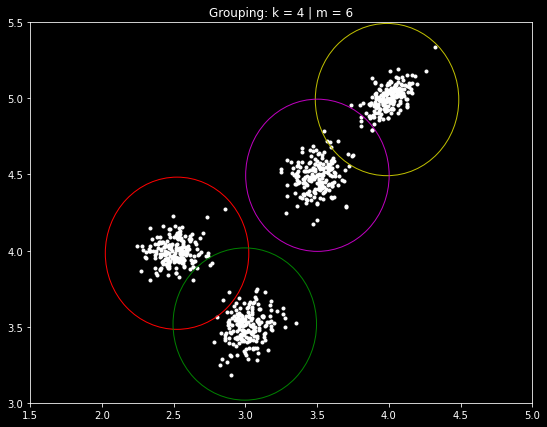

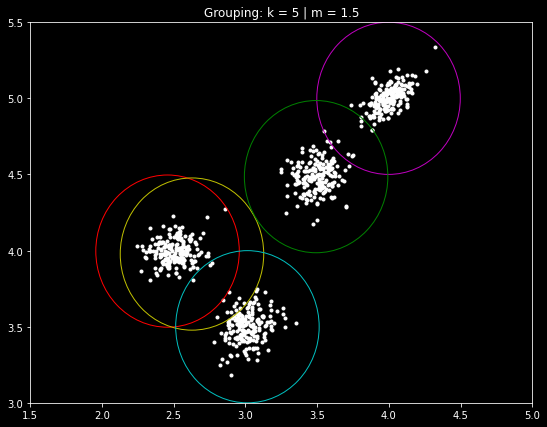

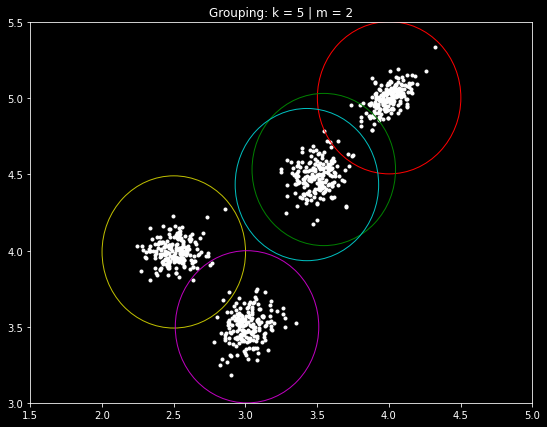

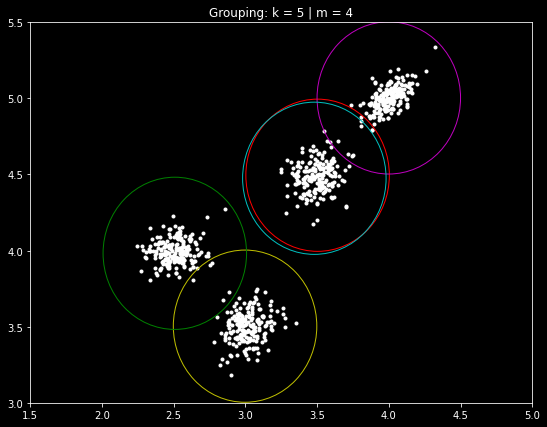

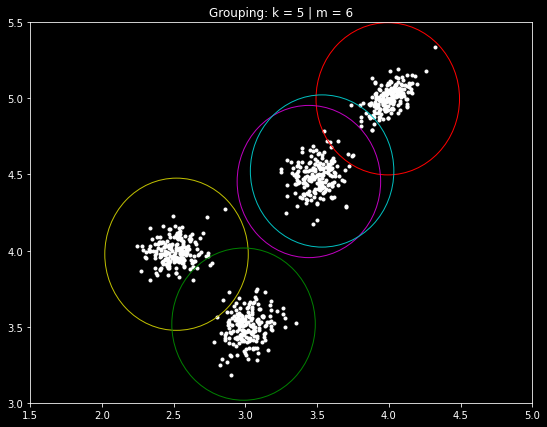

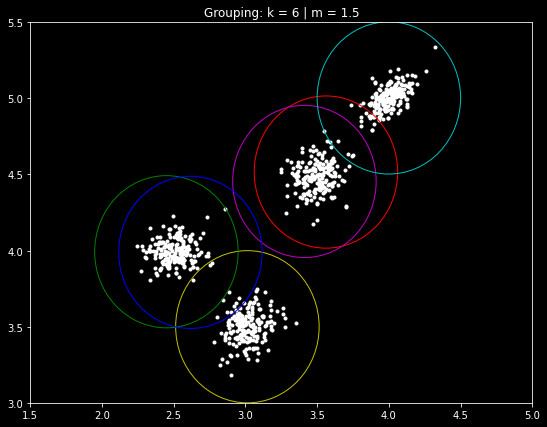

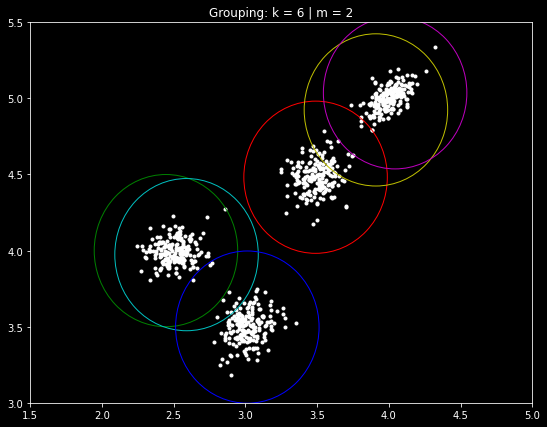

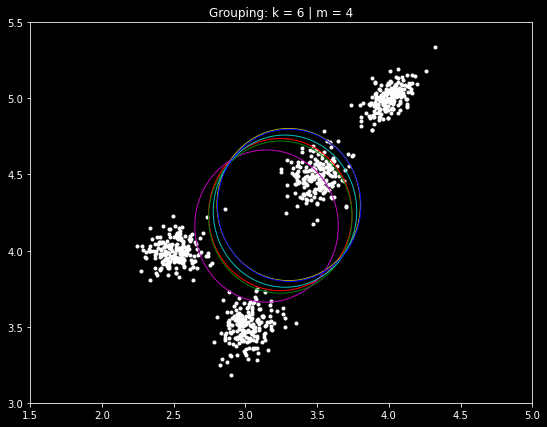

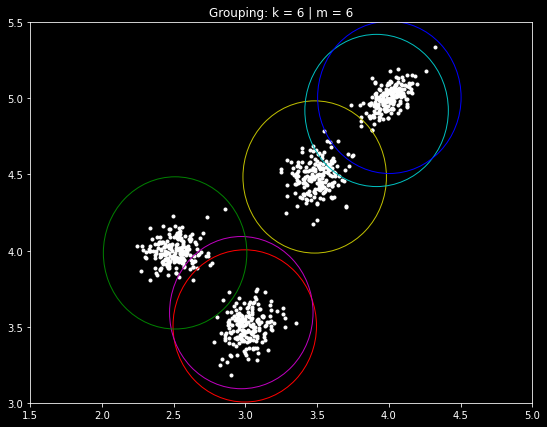

In [71]:

# Read dataset
df = pd.read_csv(filepath_or_buffer='./file/ds-fcm.csv', header=None, names=['x', 'y'])

# Determine centroids
K = [2, 3, 4, 5, 6]
M = [1.5, 2, 4, 6]

for k in K:
    for m in M:
        
        # Set and plot centroids
        setAndPlotCentroids(
            k=k, m=m, X=df.values,
            xRange=(1.5, 5), yRange=(3, 5.5),
            scale=2.5, maxDelta=.01, maxEpochs=1000
        )

        # Plot points
        plt.scatter(df['x'].values, df['y'].values, color='w', marker='.')

## Semantic Segmentation
    TODO: ADD Description

### Utils

In [74]:

def getImg(fileName: str, rescale: float = 1) -> Image:
    '''
        Returns an object representing the files image as a multi dimensional matrix.
    '''

    photo = Image.open(fileName).convert('RGB')
    height, width = photo.size
    imgSize = (int(height / rescale), int(width / rescale))
    return photo.resize(imgSize, Image.ANTIALIAS)

def getPixelsDataFrame(img: Image) -> pd.DataFrame:
    '''
        Returns a 02 dimensions matrix data frame of the image pixels.
        Shape: [rows]*[columns] lines X 03 columns (r, g, and b);

        - img: The image object that represents it as a multi dimensional matrix: [rows] X [columns] X [rgb channels];
    '''
    
    pixelsMultiD = np.asarray(img)
    height, width, _ = pixelsMultiD.shape
    rows = height * width

    pixels2d = np.zeros( (rows, 3) )

    for i in range(height):
        lower = i * width
        upper = lower + width

        pixels2d[lower:upper, 0] = pixelsMultiD[i, :, 0] # red
        pixels2d[lower:upper, 1] = pixelsMultiD[i, :, 1] # green
        pixels2d[lower:upper, 2] = pixelsMultiD[i, :, 2] # blue

    return pd.DataFrame(pixels2d, columns=['r', 'g', 'b'])


def plotAndReturnCentroids(X: np.array, K: list, M: list, maxDelta=.05, maxEpochs=1000) -> list:
    '''
        TODO: 2021-12-02 - ADD Description
    '''
    
    allCentroids = []

    for k in K:
        for m in M:
            
            # Set centroids
            cMeans = FuzzyCMeans(X=X, k=k, m=m, maxDelta=maxDelta, maxEpochs=maxEpochs)
            centroids = cMeans.fit().getCentroids()
            allCentroids.append(centroids)

            # Plot centroids in 3d space
            ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', color='r')

    return centroids

def getImgCentroidsLists(fileName: str, K: list, M: list, maxDelta=.05, maxEpochs=1000) -> list:
    '''
        TODO: 2021-12-02 - ADD Description
    '''
    
    # Set img pixels dataframe
    img = getImg(fileName=fileName, rescale=1)
    pixelsDF = getPixelsDataFrame(img)

    # Plot in 3d space
    ax.scatter(pixelsDF['r'].values, pixelsDF['g'].values, pixelsDF['b'].values, marker='.', color='b')
    centroidsLists = plotAndReturnCentroids(X=pixelsDF.values, K=K, M=M, maxDelta=maxDelta, maxEpochs=maxEpochs)
    plt.show()
    return centroidsLists

### Main

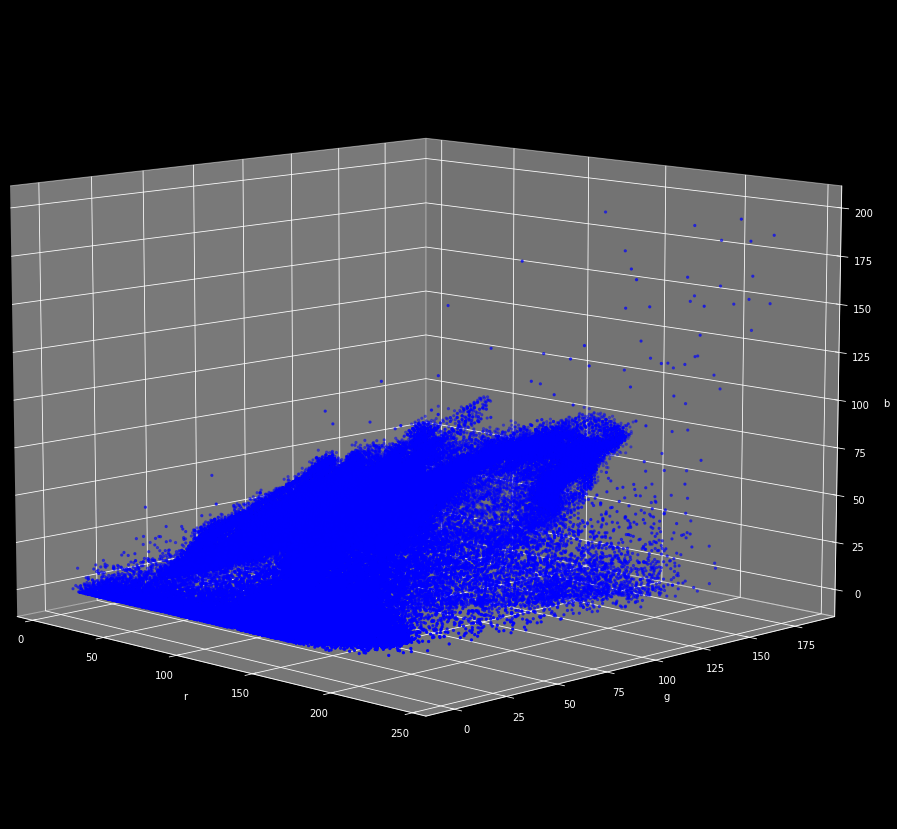

In [75]:

# Config 3D plotting
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(projection='3d')

ax.azim = -45
ax.elev = 10
ax.dist = 9

ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')

# Set parameters
PATH_IMG_DIR = './file/image-test/'
imgFiles = ['photo001.jpg']

# Test centroids detection
K = [2, 3, 4, 5, 6]
M = [1.5, 2, 4, 6]

for imgFile in imgFiles:
    fileName = os.path.join(PATH_IMG_DIR, imgFile)
    getImgCentroidsLists(fileName=fileName, K=K, M=M, maxDelta=.05, maxEpochs=1000)
